In [1]:
from tbparse import SummaryReader
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import numpy as np
from scipy.stats import bootstrap

2025-01-09 16:34:57.328098: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-09 16:34:57.357825: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736465697.380611  260386 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736465697.387572  260386 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-09 16:34:57.410734: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
def plot(env, steps, yticks=None, xticks=None):
    palette = ['xkcd:jade', 'xkcd:deep sky blue', 'xkcd:coral', 'xkcd:orange', 'xkcd:violet', 'xkcd:mauve', 'xkcd:lime']

    log_dir = os.path.join("../../../runs", env)
    df = SummaryReader(log_dir, pivot=True, extra_columns={'dir_name'}).scalars
        
    df = df[["Steps", "Test/return", "dir_name"]]
    df = df.assign(dir_name=df["dir_name"].apply(lambda s: s.split('/')[0]))

    fig = plt.figure(figsize=(5,5.5))
    ax = plt.gca()
    sns.set_theme(style='whitegrid')
    plt.grid(color='lightgray')

    g = sns.lineplot(data=df, x='Steps', y='Test/return', hue='dir_name', palette=palette) #
    g.set(xlim=(0, steps))
    if env == "Hopper-v4":
        g.set(ylim=(0, 3750))
    elif env == "Humanoid-v4":
        g.set(ylim=(0, 7500))
    else:
        g.set(ylim=(yticks[0], yticks[-1]))
    if xticks is not None:
        g.set_xticks(xticks)
    if yticks is not None:
        g.set_yticks(yticks)
    plt.legend()
    plt.title(env)

    plt.xlabel('')
    plt.ylabel('')
    plt.show()

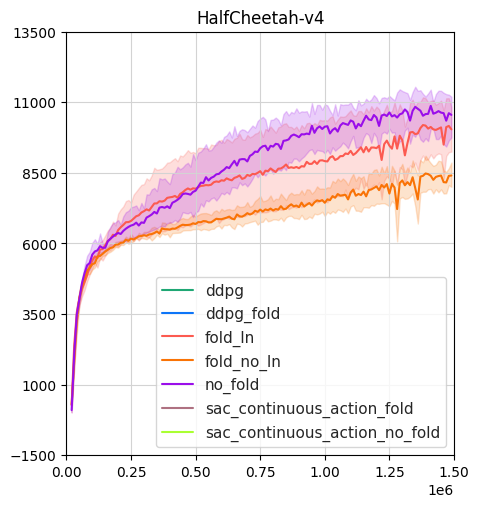

In [3]:
env = "HalfCheetah-v4"
steps = 1500000
yticks = np.arange(-1500, 13500+2500, 2500)
xticks = np.arange(0, steps+1, 250000)
plot(env, steps, yticks, xticks)

500
500
500
500
500


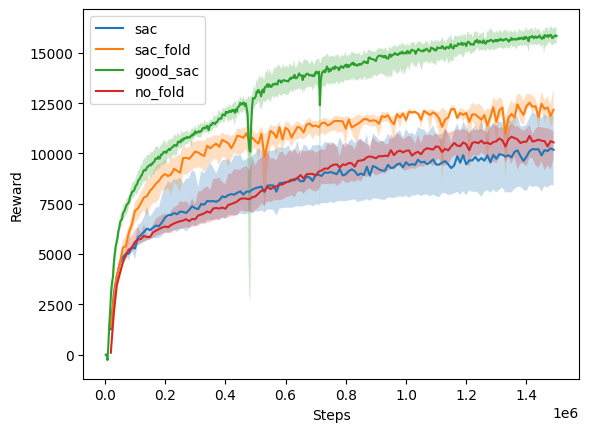

In [9]:
import tensorflow as tf
from tensorboard.backend.event_processing import event_accumulator

for algo in ['sac', 'sac_fold', 'good_sac', 'no_fold'] : 
    # Path to the log directory
    log_dir = f"../../../runs/HalfCheetah-v4/{algo}"

    algo_results = []
    for run in os.listdir(log_dir): 
        if "1736371929" in run :
            continue
        # Initialize the event accumulator
        ea = event_accumulator.EventAccumulator(os.path.join(log_dir, run))
        ea.Reload()

        events = ea.Scalars('Test/return')
        steps = [e.step for e in events]
        if algo == 'good_sac':
            steps = np.arange(3000, 1500001, 3000)
            print(len(steps))
        algo_results.append([e.value for e in events])

    res = bootstrap((np.array(algo_results),), np.mean)
    plt.plot(steps, np.mean(np.array(algo_results), axis=0), label=algo)
    plt.fill_between(steps, res.confidence_interval.low, res.confidence_interval.high, alpha=0.25)

plt.xlabel('Steps')
plt.ylabel('Reward')
plt.legend()
plt.show()

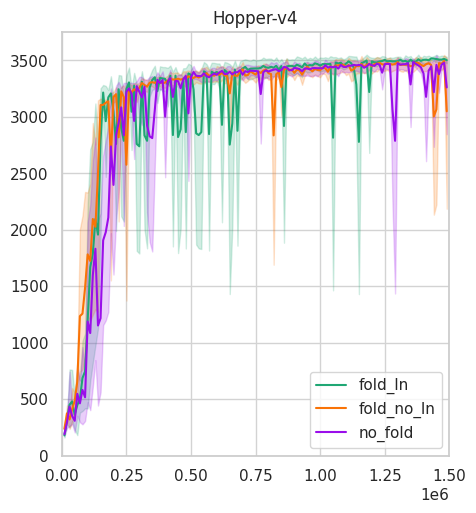

In [16]:
env = "Hopper-v4"
steps = 1500000
yticks = np.arange(0, 3500+500, 500)
xticks = np.arange(0, steps+1, 250000)
plot(env, steps, yticks, xticks)